In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200622.csv',sep=";", quotechar='"' )

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200629.csv',sep=";", quotechar='"' )

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200706.csv',sep=";", quotechar='"' )

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200713.csv',sep=";", quotechar='"' )

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
print("The shape of the DataFrame is => {}".format(df.shape))

The shape of the DataFrame is => (4194292, 7)


In [ ]:
df.head()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,quotaintervaltype
0,X28111001XXX,Q_PT_200,NaN,NaN,512000,0,NaN
1,X28111001XXX,Q_VB_Post_Movie1,26214400.0,20.0,25809408,404992,NaN
2,X28111001XXX,Q_VBDPI_Post_MyMovie1,26214400.0,20.0,26210688,3712,NaN
3,X28111001XXX,Q_MKT2_100,NaN,NaN,204800,0,NaN
4,6281110018XX,Q_MKT2_100,NaN,NaN,204800,0,NaN


In [ ]:
df.drop(['quotaintervaltype'], axis=1, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption
1,X28111001XXX,Q_VB_Post_Movie1,26214400.0,20.0,25809408,404992
2,X28111001XXX,Q_VBDPI_Post_MyMovie1,26214400.0,20.0,26210688,3712
5,6281110018XX,Q_VBDPI_Post_MyMovie1,10485760.0,20.0,10485760,0
7,6281110018XX,Q_VB4G_Post_Movie1,8388608.0,20.0,8388608,0
8,6281110018XX,Q_VB_Post_Movie1,2097152.0,20.0,2097152,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302341 entries, 1 to 1048564
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   msisdn         302341 non-null  object 
 1   quotaname      302341 non-null  object 
 2   quotavalue     302341 non-null  float64
 3   quotainterval  302341 non-null  float64
 4   balance        302341 non-null  int64  
 5   consumption    302341 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 16.1+ MB


In [ ]:
print("Unique Values in `balance` => {}".format(np.sort(df.quotavalue.unique())))

Unique Values in `balance` => [1.00000000e+00 3.07200000e+03 1.02400000e+04 2.04800000e+04
 2.56000000e+04 5.12000000e+04 1.02400000e+05 1.02470000e+05
 1.53600000e+05 2.04800000e+05 2.56000000e+05 3.07200000e+05
 5.12000000e+05 5.24289000e+05 6.14400000e+05 1.02400000e+06
 1.04857600e+06 1.57286400e+06 1.67772200e+06 1.88743700e+06
 2.08486400e+06 2.09715200e+06 2.09722200e+06 2.60915200e+06
 2.62144000e+06 3.14572800e+06 3.67001600e+06 4.19430400e+06
 5.24288000e+06 6.29145600e+06 8.38860800e+06 1.04857600e+07
 1.25829120e+07 1.25829820e+07 1.46800640e+07 1.57286400e+07
 1.67772160e+07 1.88743680e+07 2.09715200e+07 2.30686720e+07
 2.51658240e+07 2.62144000e+07 3.14572800e+07 3.35544320e+07
 3.67001600e+07 3.98458880e+07 4.19430400e+07 5.24288000e+07
 6.29145600e+07 7.34003200e+07 7.86432000e+07 8.38860800e+07
 8.91289600e+07 1.03809024e+08 1.04857600e+08 1.25829120e+08
 1.67772160e+08]


In [ ]:
df['quotavalue'] = df['quotavalue'].astype('int64')
df['quotainterval'] = df['quotainterval'].astype('int64')

In [ ]:
df.describe()

,quotavalue,quotainterval,balance,consumption
count,3.023410e+05,302341.000000,3.023410e+05,3.023410e+05
mean,9.861835e+06,10.687611,8.200151e+06,1.617219e+06
std,1.070176e+07,7.181536,1.042170e+07,3.675822e+06
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.145728e+06,6.000000,1.676416e+06,0.000000e+00
50%,8.388608e+06,11.000000,4.242486e+06,4.838400e+04
75%,1.258291e+07,20.000000,1.048576e+07,1.353216e+06
max,1.677722e+08,90.000000,1.677702e+08,1.258294e+08


In [ ]:
df['sum']=df['quotavalue']-df['consumption']
# df['sum']=df['sum']<0 * -1
# df['sum']=abs(df['sum'])

df.sample(n=10)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum
864772,62X5210461XXX,Q_VB_Post_Movie1,10485760,11,10485760,0,10485760
917315,628X3X762X3XX,Q_VB_Post_ADD,1048576,11,0,1048577,-1
141535,62821221002XX,Q_VB_post_EKRC,20971520,20,0,20971558,-38
798951,X2X11X337XXX,Q_VB_Post_Movie1,2097152,20,2097152,0,2097152
241866,6281116X4XX,Q_VB4G_Post_Movie2,16777216,20,16777216,0,16777216
794229,62X11155X6XX,Q_VBDPI_Post_MyMovie1,16777216,20,15359872,1417344,15359872
380379,6X8X1145160XX,Q_VB_Post_Movie2,2097152,20,1588608,508544,1588608
715051,6X81110155XX,Q_VB_post_EKRC,10485760,1,0,10485779,-19
715290,X281111015XX,Q_VB4G_Post_Movie1,4194304,6,0,4194560,-256
716248,62811341XXXX,Q_VB4G_Post_Movie1,8388608,6,8388608,0,8388608


In [ ]:
df['status']=df['balance']==df['sum']
df.sample(n=15)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum,status
353946,6281X1018X9XX,Q_VBDPI_Post_MyMovie1,10485760,1,10436992,48768,10436992,True
273277,628X2XX75XXX,Q_VB4G_Post_FreeQuotaUtil,2097152,11,2074317,22835,2074317,True
873898,628111002XX,Q_VB4G_Post_Movie1,125829120,1,119276928,6552192,119276928,True
241791,X2X111X123XX,Q_VBDPI_Post_MyMovie1,10485760,6,9910656,575104,9910656,True
677934,6281X55X522XX,Q_VB_Post_Movie1,26214400,11,23188736,3025664,23188736,True
920210,6281X844697XX,Q_VB4G_Post_FreeQuotaUtil,10485760,11,1822647,8663113,1822647,True
556682,6281110002XX,Q_VBDPI_Post_MyMovie1,10485760,11,10420096,65664,10420096,True
796302,628XX82002XX,Q_VB_Post_Perp,5242880,20,0,5242885,-5,False
796412,62X1113517XX,Q_VB4G_Post_Movie1,8388608,1,5553792,2834816,5553792,True
350145,6X81X98X999XX,Q_VB_Post_Movie1,4194304,6,648064,3546240,648064,True


In [ ]:
df['status'] = df['status'].replace({True: 'Normal', False: 'Fraud'})
df.tail()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum,status
1048553,6X81XX9544XX,Q_VB_Post_Movie2,4194304,11,4194304,0,4194304,Normal
1048554,6X81XX9544XX,Q_VB4G_Post_Movie2,12582912,11,12582912,0,12582912,Normal
1048560,62812296XXXX,Q_VB_Post_Movie1,4194304,6,4194304,0,4194304,Normal
1048562,62812296XXXX,Q_VBDPI_Post_MyMovie1,16777216,6,16646912,130304,16646912,Normal
1048564,62812296XXXX,Q_VB4G_Post_Movie1,12582912,6,9506304,3076608,9506304,Normal


EDA

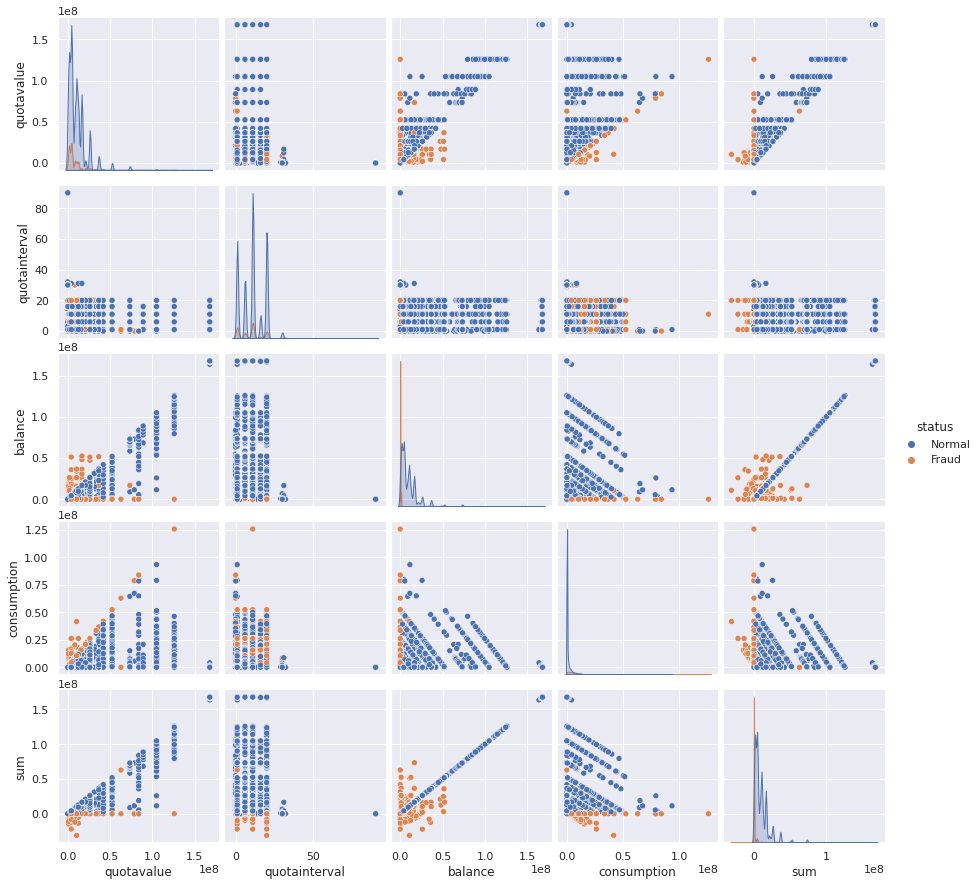

In [ ]:
sns.pairplot(df, hue='status')

In [ ]:
def converter(cluster):
    if cluster=='Fraud':
        return 1
    else:
        return 0

In [ ]:
df['Cluster'] = df['status'].apply(converter)

In [ ]:
df.sample(n=10)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum,status,Cluster
515247,62X13145X72XX,Q_VB4G_Post_Movie1,8388608,11,1980288,6408320,1980288,Normal,0
875329,62811808X5XX,Q_VB_Post_Perp,10485760,1,8792002,1693758,8792002,Normal,0
952877,6X81113508XXX,888,2084864,20,2080099,4765,2080099,Normal,0
41116,X28131992X5XX,Q_VB_Post_Movie1,2097152,20,2097152,0,2097152,Normal,0
936086,628211X825XXX,Q_VB4G_Post_FreeQuotaUtil,2097152,11,147212,1949940,147212,Normal,0
984310,6281299XXXXXX,Q_VBDPI_Post_MyMovie1,15728640,11,15358080,370560,15358080,Normal,0
982693,6X8XX900900XX,Q_Pos_Flash_Volume_225rb,8388608,11,6005364,2383244,6005364,Normal,0
507700,6X81XX40603XX,Q_VBDPI_Post_MyMovie1,16777216,20,16291200,486016,16291200,Normal,0
323998,6281199104XX,Q_VB4G_Post_Movie1,8388608,11,8225408,163200,8225408,Normal,0
585460,X2812X238XXX,Q_Pos_iFree3MB,3072,6,3072,0,3072,Normal,0


In [ ]:
df.drop(['status'], axis=1, inplace=True)

In [ ]:
df.sample(n=5)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum,Cluster
511905,X2813122382XX,Q_VB_Post_Movie1,4194304,6,0,4194560,-256,1
181484,6281287401XXX,Q_VB4G_Post_Movie1,12582912,20,12535680,47232,12535680,0
879165,628XX8850XX,Q_VBDPI_Post_MyMovie1,36700160,6,36697216,2944,36697216,0
270688,6X81XX6633XX,Q_VB_Post_Movie1,4194304,20,4194304,0,4194304,0
331251,6X81X190817XX,Q_VB4G_Post_Movie1,4194304,1,3704832,489472,3704832,0


In [ ]:
df.drop(['sum'], axis=1, inplace=True)

In [ ]:
df.sample(n=10)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,Cluster
163536,6X81180XX1XX,Q_VBDPI_Post_MyMovie1,36700160,6,36382848,317312,0
1037208,62X114423XX,Q_VBDPI_Post_MyMovie1,52428800,1,52402560,26240,0
172259,628121XX8X2XX,Q_VBDPI_Post_MyMovie1,5242880,11,5227648,15232,0
1039917,X28111X3XXX,Q_VBDPI_Post_MyMovie1,73400320,1,73100672,299648,0
1039781,X2811978128XX,888,12582912,1,3002291,9580621,0
881194,62X111X9X9XX,Q_VBDPI_Post_MyMovie1,16777216,20,16766080,11136,0
75023,628521581X3XX,Q_VB_Post_Movie1,2097152,11,2097152,0,0
480540,6X8111X848XX,Q_VB_Post_Movie1,5242880,11,5242880,0,0
877466,628112727XX,Q_VB4G_Post_Movie1,8388608,1,8388608,0,0
799885,6281112832XX,Q_VB_Post_Movie1,26214400,6,21257728,4956672,0


In [ ]:
df.describe()

,quotavalue,quotainterval,balance,consumption,Cluster
count,3.023410e+05,302341.000000,3.023410e+05,3.023410e+05,302341.000000
mean,9.861835e+06,10.687611,8.200151e+06,1.617219e+06,0.109013
std,1.070176e+07,7.181536,1.042170e+07,3.675822e+06,0.311656
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.145728e+06,6.000000,1.676416e+06,0.000000e+00,0.000000
50%,8.388608e+06,11.000000,4.242486e+06,4.838400e+04,0.000000
75%,1.258291e+07,20.000000,1.048576e+07,1.353216e+06,0.000000
max,1.677722e+08,90.000000,1.677702e+08,1.258294e+08,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df.drop(['msisdn'], axis=1, inplace=True)
df.drop(['quotaname'], axis=1, inplace=True)

In [ ]:
scaler.fit(df.drop('Cluster', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_feat = scaler.transform(df.drop('Cluster', axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_feat, columns=df.columns[:-1])
df_feat.head()

,quotavalue,quotainterval,balance,consumption
0,1.528029,1.296715,1.689675,-0.329784
1,1.528029,1.296715,1.728180,-0.438952
2,0.058301,1.296715,0.219313,-0.439962
3,-0.137662,1.296715,0.018083,-0.439962
4,-0.725553,1.296715,-0.585606,-0.439962


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_feat
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predict & Evaluatiom

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(pred)

[0 1 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, pred))

[[80704    17]
 [   10  9972]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80721
           1       1.00      1.00      1.00      9982

    accuracy                           1.00     90703
   macro avg       1.00      1.00      1.00     90703
weighted avg       1.00      1.00      1.00     90703



Another K Value

In [ ]:
error_rates = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(preds != y_test))

In [ ]:
np.array(error_rates)

array([0.00029767, 0.00045202, 0.000882  , 0.0011907 , 0.00137812,
       0.00144427, 0.00157657, 0.00170887, 0.0018522 , 0.00205065,
       0.00227115, 0.00234832, 0.00250267, 0.0026019 , 0.00274522,
       0.00271215, 0.0028224 , 0.00289957, 0.00298777, 0.00302085,
       0.00310905, 0.00310905, 0.00319725, 0.00316417, 0.0032193 ,
       0.00324135, 0.00337365, 0.00346185, 0.00356107, 0.00362722,
       0.0037485 , 0.0037485 , 0.00385875, 0.00394695, 0.00404617,
       0.0041013 , 0.0043218 , 0.0044541 , 0.0045864 ])

Text(0, 0.5, 'Error Rate')

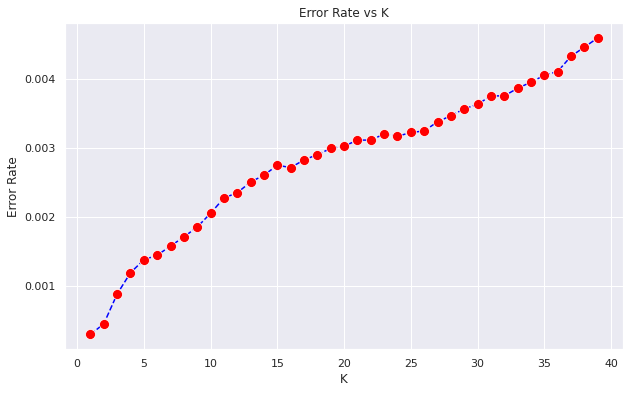

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 40), y=error_rates, color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.title('Error Rate vs K')
plt.xlabel("K")
plt.ylabel("Error Rate")

Retrain

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[80521   200]
 [  129  9853]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80721
           1       0.98      0.99      0.98      9982

    accuracy                           1.00     90703
   macro avg       0.99      0.99      0.99     90703
weighted avg       1.00      1.00      1.00     90703



In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[80704    17]
 [   24  9958]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80721
           1       1.00      1.00      1.00      9982

    accuracy                           1.00     90703
   macro avg       1.00      1.00      1.00     90703
weighted avg       1.00      1.00      1.00     90703



Another Split test Train Ratio

Rasio 90:10

In [ ]:
X1 = df_feat
y1 = df['Cluster']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=101)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn1.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred1 = knn1.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, pred1))

[[26885     3]
 [    1  3346]]


In [ ]:
print(classification_report(y1_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26888
           1       1.00      1.00      1.00      3347

    accuracy                           1.00     30235
   macro avg       1.00      1.00      1.00     30235
weighted avg       1.00      1.00      1.00     30235



In [ ]:
error_rates = []

for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X1_train, y1_train)
    preds1 = knn1.predict(X1_test)
    error_rates.append(np.mean(preds1 != y1_test))

In [ ]:
np.array(error_rates)

array([0.0001323 , 0.00019845, 0.00039689, 0.00042997, 0.00066149,
       0.00072763, 0.000893  , 0.00112452, 0.00119067, 0.00119067,
       0.00132297, 0.00142219, 0.00165371, 0.00171986, 0.00191831,
       0.00201753, 0.00214983, 0.00214983, 0.00234827])

Text(0, 0.5, 'Error Rate')

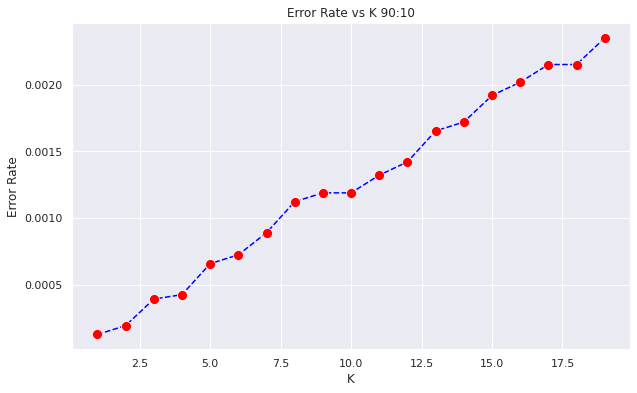

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 20), y=error_rates, color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.title('Error Rate vs K 90:10')
plt.xlabel("K")
plt.ylabel("Error Rate")

Rasio 80:20

In [ ]:
X2 = df_feat
y2 = df['Cluster']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn2.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
pred2 = knn2.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, pred2))

[[53789    11]
 [   10  6659]]


In [ ]:
print(classification_report(y2_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53800
           1       1.00      1.00      1.00      6669

    accuracy                           1.00     60469
   macro avg       1.00      1.00      1.00     60469
weighted avg       1.00      1.00      1.00     60469



In [ ]:
error_rates = []

for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train, y2_train)
    preds2 = knn2.predict(X2_test)
    error_rates.append(np.mean(preds2 != y2_test))

In [ ]:
np.array(error_rates)

array([0.0002646 , 0.00034729, 0.00054573, 0.00067803, 0.00092609,
       0.00114108, 0.0012403 , 0.0015049 , 0.00155452, 0.00167028,
       0.00183565, 0.00195141, 0.00218294, 0.0022987 , 0.00244754,
       0.00249715, 0.00261291, 0.00264598, 0.00279482])

Text(0, 0.5, 'Error Rate')

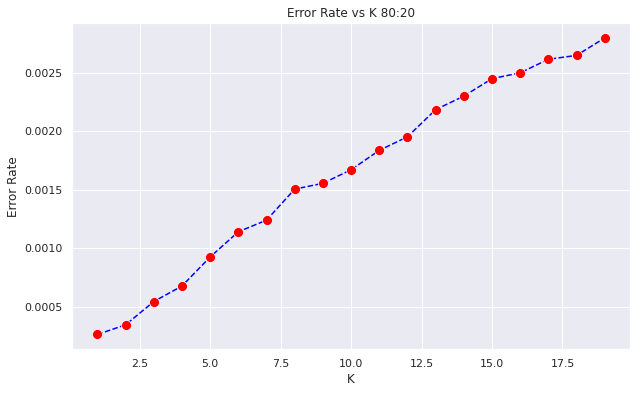

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 20), y=error_rates, color='blue', linestyle='dashed', marker='o', markersize=10, markerfacecolor='red')
plt.title('Error Rate vs K 80:20')
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y2_test, pred2)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 53789
FP - False Positive 11
FN - False Negative 10
TP - True Positive 6659
Accuracy Rate: 0.9996527146140998
Misclassification Rate: 0.00034728538590021333
